# ...visualize a valid pixel count?

In some cases it can be useful to count the number of valid pixels in a dataset 
and visualize the result. The resulting array could also be used as a layer in 
further analysis.

The following is an example on how to achieve this using a combination of NumPy's 
[`isfinite`-method](https://numpy.org/doc/stable/reference/generated/numpy.isfinite.html) and Xarray's [`sum`-method](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.sum.html):

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sdc.load import load_product
from sdc.utils import groupby_acq_slices

In [2]:
time_range = ("2021-01-01", "2022-01-01")
ds = load_product(product="s2_l2a", 
                  vec="site06", 
                  time_range=time_range)

[WARNING] Loading data for an entire SALDi site will likely result in performance issues as it will load data from multiple tiles. Only do so if you know what you are doing and have optimized your workflow! It is recommended to start with a small subset to test your workflow before scaling up.


In [3]:
valid_px_count = np.isfinite(ds.B08).sum(dim="time")
valid_px_count

<xarray.DataArray 'B08' (latitude: 5500, longitude: 6500)> Size: 286MB
dask.array<sum-aggregate, shape=(5500, 6500), dtype=int64, chunksize=(360, 425), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 44kB -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 52kB 30.75 30.75 30.75 ... 32.05 32.05
    spatial_ref  int32 4B 4326
Attributes:
    nodata:   0

Text(0.5, 1.0, 'Valid pixel count, Sentinel-2 L2A (2021-01-01 to 2022-01-01)')

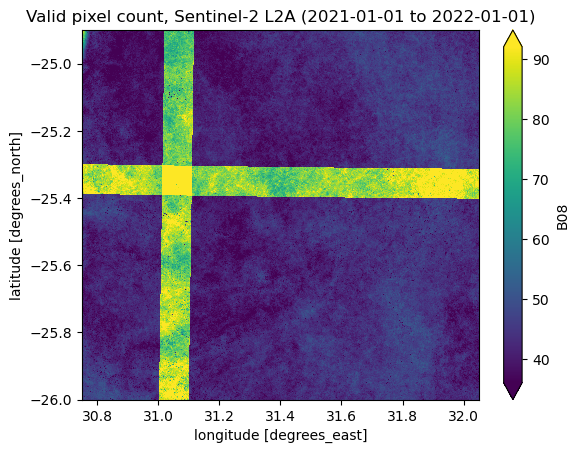

In [4]:
valid_px_count.plot(robust=True)
plt.title(f"Valid pixel count, Sentinel-2 L2A ({time_range[0]} to {time_range[1]})")

Interesting pattern we can observe here... I'll let you guess why this is the 
case 😉 (Hint: {ref}`group-acq-slices`)

Let's do this again, but group the data first by acquisition slices in 
order to not count the same pixels multiple times:

Text(0.5, 1.0, 'Valid pixel count, Sentinel-2 L2A (2021-01-01 to 2022-01-01)')

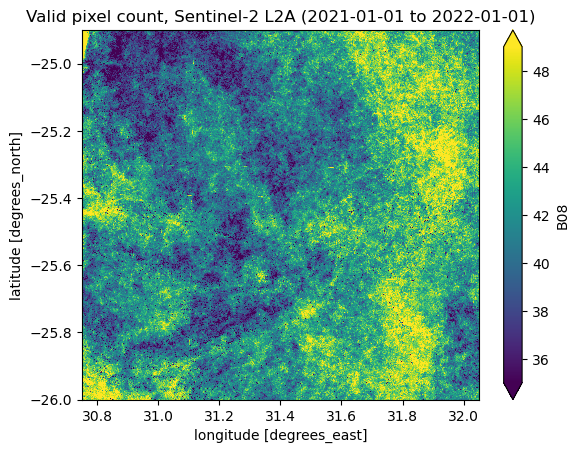

In [5]:
ds_grouped = groupby_acq_slices(ds)

valid_px_count_grouped = np.isfinite(ds_grouped.B08).sum(dim="time")
valid_px_count_grouped.plot(robust=True)
plt.title(f"Valid pixel count, Sentinel-2 L2A ({time_range[0]} to {time_range[1]})")